In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
card=pd.read_csv("/content/credit_card.csv")
card.head()
card

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


Q1. Perform EDA on the given data. What does the primary analysis of several categorical features reveal? 🡪5 marks

**CUST_ID**
Unique values: ['C10001' 'C10002' 'C10003' ... 'C19188' 'C19189' 'C19190']
Value counts:
C10001    1
C16135    1
C16129    1
C16130    1
C16131    1
         ..
C13065    1
C13064    1
C13063    1
C13062    1
C19190    1
Name: CUST_ID, Length: 8950, dtype: int64



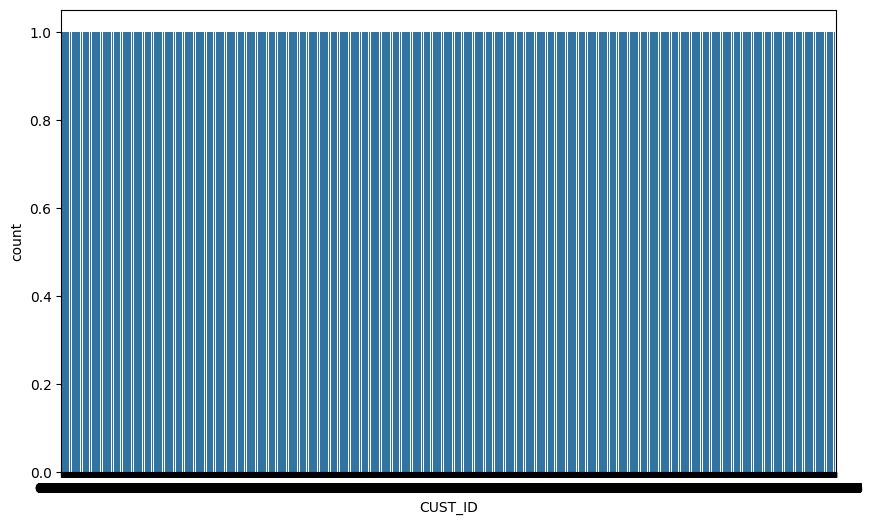

In [ ]:
# Check for missing values
card.isnull().sum()

# Explore categorical features
cat_cols = card.select_dtypes(include='object').columns.tolist()

for col in cat_cols:
    print(f"**{col}**")
    print(f"Unique values: {card[col].unique()}")
    print(f"Value counts:\n{card[col].value_counts()}")
    print()

# Analyze relationships between categorical features
for i, col1 in enumerate(cat_cols):
    for col2 in cat_cols[i+1:]:
        print(f"**Relationship between {col1} and {col2}**")
        print(pd.crosstab(card[col1], card[col2]))
        print()

# Visualize categorical features
for col in cat_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=card)
    plt.show()


Q2. Perform the following Exploratory Data Analysis tasks:6 marks


a.Missing Value Analysis

In [ ]:
# Missing Value Analysis

# Check for missing values
missing_values = card.isnull().sum()

# Identify columns with missing values
cols_with_missing_values = missing_values[missing_values > 0].index.tolist()

# Analyze missing values for each column
for col in cols_with_missing_values:
    print(f"**{col}**")
    print(f"Missing values: {missing_values[col]}")
    print(f"Percentage of missing values: {missing_values[col] / len(card) * 100:.2f}%")
    print()

# Impute missing values
for col in cat_cols:
    card[col].fillna(card[col].mode()[0], inplace=True)


**CREDIT_LIMIT**
Missing values: 1
Percentage of missing values: 0.01%

**MINIMUM_PAYMENTS**
Missing values: 313
Percentage of missing values: 3.50%



In [ ]:
# label encoder

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
    card[col] = le.fit_transform(card[col])


In [ ]:
#  Perform scaling in card using standard scaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(card)

# Convert the scaled data back to a DataFrame
scaled_data = pd.DataFrame(scaled_data, columns=card.columns)

# Print the scaled data
card_s=card


b.Outlier Treatment using the Z-score method

In [ ]:
#IQR method

Q1 = scaled_data.quantile(0.25)
Q3 = scaled_data.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = scaled_data[~((scaled_data <= upper_bound) & (scaled_data >= lower_bound))].index.tolist()

scaled_data.drop(outliers, inplace=True)

card.head()


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
#  z score to card

from scipy import stats

z_scores = stats.zscore(card_s)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
card_scale = card_s[filtered_entries]



c. Deal with correlated variables:


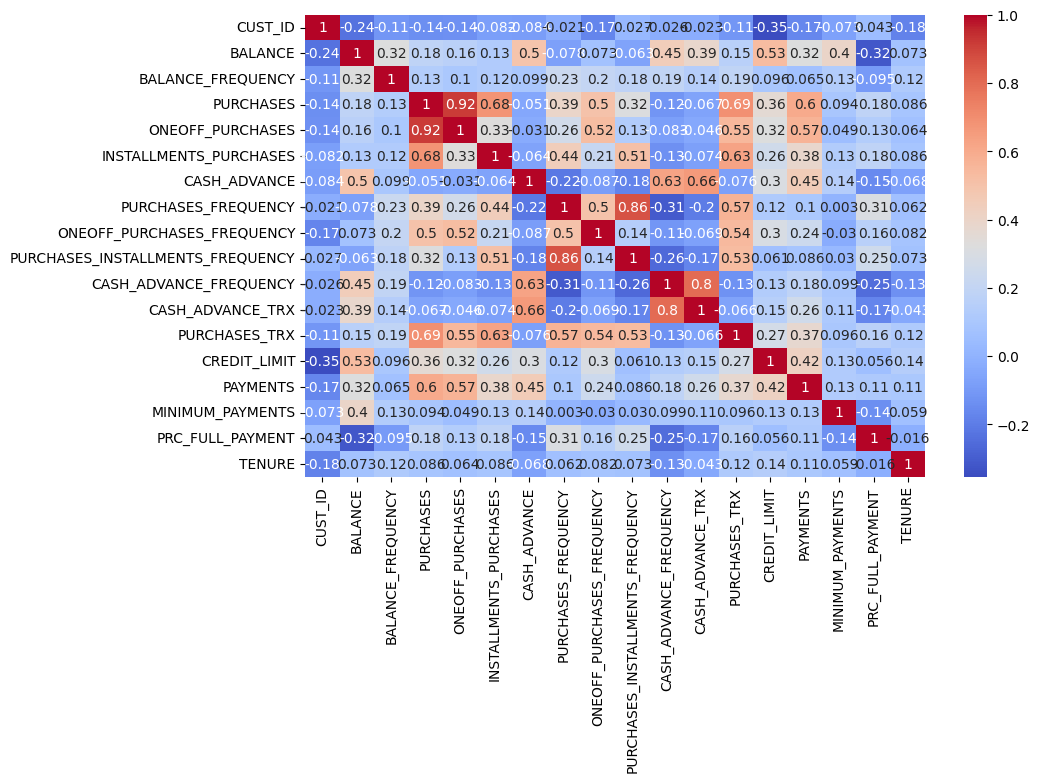

In [ ]:
#  correlation for card

corr_matrix = card.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


Q3. Perform dimensionality reduction using PCA such that the 95% of the variance is explained🡪2 marks

In [ ]:
card.isna().sum()
card = card.dropna()

In [ ]:
!pip install scikit-learn
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")
card = imputer.fit_transform(card)

In [ ]:
pca = PCA(n_components=0.95)
pca.fit(card)
reduced_data = pca.transform(card)
print(reduced_data)



[[-3209.73639442  -800.7557806  -2343.69217687  3176.99088238
   3695.2531656     21.75979391]
 [ 4988.12454196 -3058.88806482  1386.38314421  -479.99916005
   5140.02928289    56.41736388]
 [ 2497.52863753 -3262.71270487 -3273.32116204  1899.25639652
    862.45827197  -326.19721084]
 ...
 [-5396.19911417  1803.28280707  1296.56707468 -1768.4943945
  -1845.30398772    20.51834019]
 [-5799.66709451  1901.83213104  1461.86072002 -1689.2941033
  -1597.76698451   -73.25222803]
 [-4665.89169156  2470.06366371  1114.946154   -1504.18979455
  -2206.65877054  -775.34291632]]


In [ ]:
import pandas as pd
# Create a dataframe from the reduced data
df_reduced = pd.DataFrame(reduced_data)

# Name the columns in the dataframe
df_reduced.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'TENURE']

# Print the dataframe
print(df_reduced.head())


           PC1          PC2          PC3          PC4          PC5      TENURE
0 -3209.736394  -800.755781 -2343.692177  3176.990882  3695.253166   21.759794
1  4988.124542 -3058.888065  1386.383144  -479.999160  5140.029283   56.417364
2  2497.528638 -3262.712705 -3273.321162  1899.256397   862.458272 -326.197211
3 -2644.968615  -894.433427 -1966.579903  3146.899490  3745.599349 -274.331047
4  -865.884850  -524.890972  -676.687815  4693.968337  2684.923126 -255.956461


Q4. Find the optimum value of k for k-means clustering using the elbow method. Plot the elbow curve🡪2 marks

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

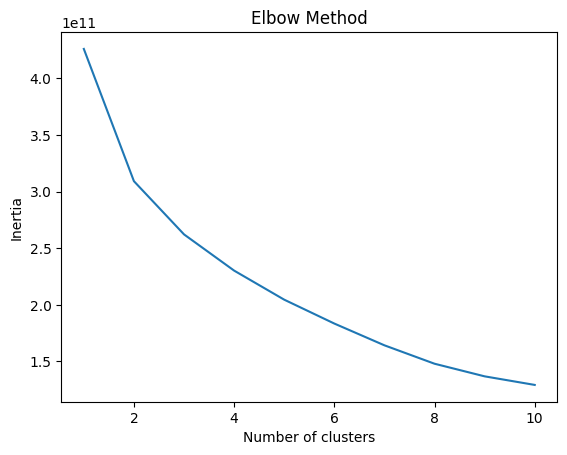

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calculate inertia for different values of k
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_reduced)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()



In [ ]:
# Choose the optimum value of k
optimum_k = 3

# Perform k-means clustering with the optimum value of k
kmeans = KMeans(n_clusters=optimum_k, random_state=0)
kmeans.fit(df_reduced)

# Add the cluster labels to the dataframe
df_reduced['Cluster'] = kmeans.labels_

# Print the dataframe
print(df_reduced.head())


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


           PC1          PC2          PC3          PC4          PC5  \
0 -3209.736394  -800.755781 -2343.692177  3176.990882  3695.253166   
1  4988.124542 -3058.888065  1386.383144  -479.999160  5140.029283   
2  2497.528638 -3262.712705 -3273.321162  1899.256397   862.458272   
3 -2644.968615  -894.433427 -1966.579903  3146.899490  3745.599349   
4  -865.884850  -524.890972  -676.687815  4693.968337  2684.923126   

       TENURE  Cluster  
0   21.759794        0  
1   56.417364        1  
2 -326.197211        1  
3 -274.331047        0  
4 -255.956461        0  


Q5. Find the optimum value of k for k-means clustering using the silhouette score method. Build a K-means clustering model and specify the number of observations in each cluster using a bar plot🡪5 marks

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

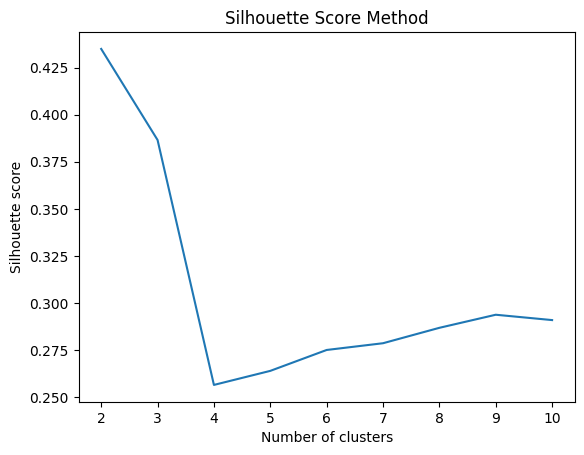

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


           PC1          PC2          PC3          PC4          PC5  \
0 -3209.736394  -800.755781 -2343.692177  3176.990882  3695.253166   
1  4988.124542 -3058.888065  1386.383144  -479.999160  5140.029283   
2  2497.528638 -3262.712705 -3273.321162  1899.256397   862.458272   
3 -2644.968615  -894.433427 -1966.579903  3146.899490  3745.599349   
4  -865.884850  -524.890972  -676.687815  4693.968337  2684.923126   

       TENURE  Cluster  
0   21.759794        3  
1   56.417364        0  
2 -326.197211        3  
3 -274.331047        3  
4 -255.956461        3  


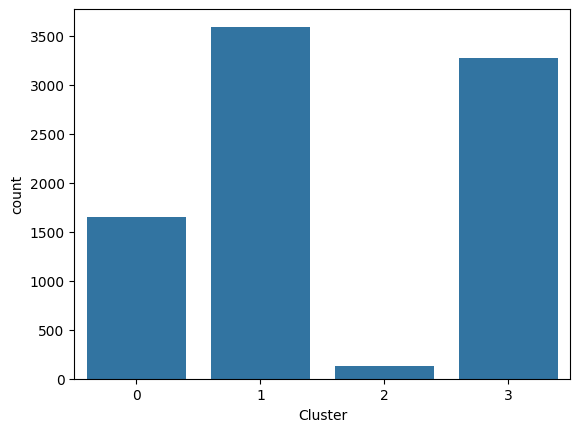

In [ ]:
from sklearn.metrics import silhouette_score

# Calculate silhouette scores for different values of k
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_reduced)
    silhouette_scores.append(silhouette_score(df_reduced, kmeans.labels_))

# Plot the silhouette scores
plt.plot(range(2, 11), silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette Score Method')
plt.show()

# Choose the optimum value of k
optimum_k = 4

# Perform k-means clustering with the optimum value of k
kmeans = KMeans(n_clusters=optimum_k, random_state=0)
kmeans.fit(df_reduced)

# Add the cluster labels to the dataframe
df_reduced['Cluster'] = kmeans.labels_

# Print the dataframe
print(df_reduced.head())

# Create a bar plot to show the number of observations in each cluster
sns.countplot(x='Cluster', data=df_reduced)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


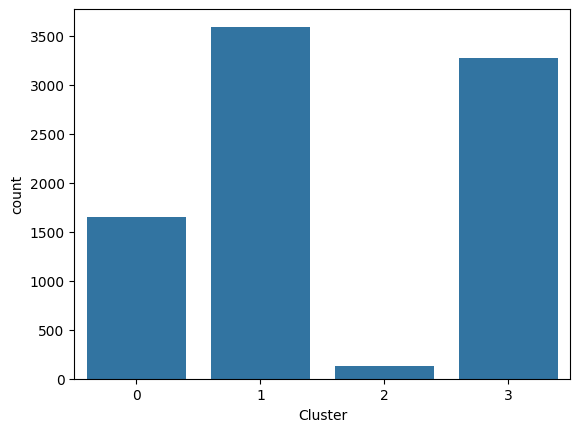

In [ ]:
# Perform K-means clustering with the optimum value of k
kmeans = KMeans(n_clusters=optimum_k, random_state=0)
kmeans.fit(df_reduced)

# Add the cluster labels to the dataframe
df_reduced['Cluster'] = kmeans.labels_

# Create a bar plot to show the number of observations in each cluster
sns.countplot(x='Cluster', data=df_reduced)
plt.show()


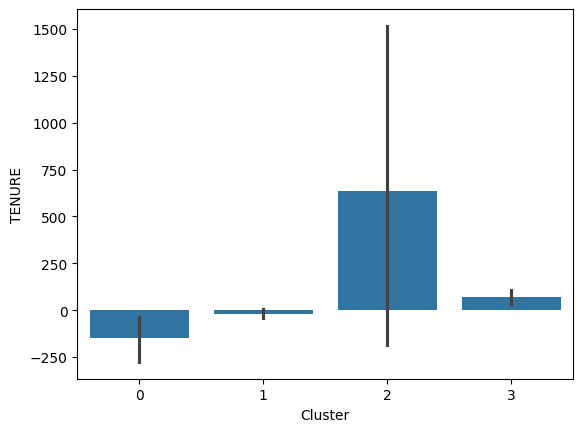

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot
sns.barplot(x='Cluster', y='TENURE', data=df_reduced)

# Show the plot
plt.show()
